In [4]:
import pandas
import numpy
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

d:\conda\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
d:\conda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


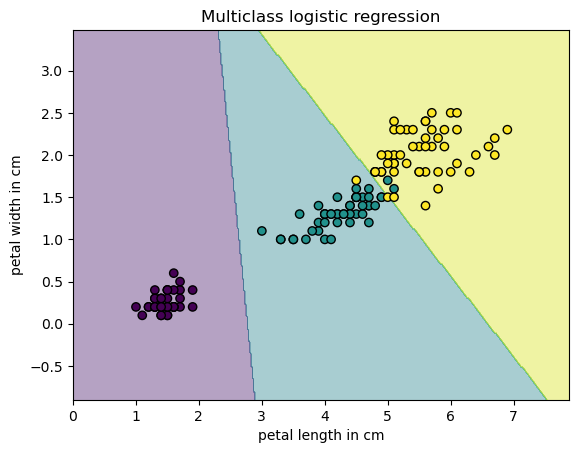

In [6]:
iris = load_iris()
dataframe = pandas.DataFrame(iris.data, columns=iris.feature_names)
dataframe['target'] = iris.target

X = dataframe[['petal length (cm)', 'petal width (cm)']]
Y = dataframe['target']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

clf = LogisticRegression(multi_class='multinomial', max_iter=1000)
clf.fit(X_train, Y_train)

X_min, X_max = X['petal length (cm)'].min() - 1, X['petal length (cm)'].max() + 1
Y_min, Y_max = X['petal width (cm)'].min() - 1, X['petal width (cm)'].max() + 1
XX, YY = numpy.meshgrid(numpy.arange(X_min, X_max, 0.02), numpy.arange(Y_min, Y_max, 0.02))

Pred = clf.predict(numpy.c_[XX.ravel(), YY.ravel()])
Pred = Pred.reshape(XX.shape)

plt.contourf(XX, YY, Pred, alpha = 0.4)
scatter = plt.scatter(
    X['petal length (cm)'], X['petal width (cm)'],
    c=Y, edgecolor = 'k')
plt.xlabel('petal length in cm')
plt.ylabel('petal width in cm')
plt.title('Multiclass logistic regression')
plt.show()